In [8]:
# Install pip packages in the current Jupyter kernel
# Uncomment if needed

# import sys
# !{sys.executable} -m pip install --quiet --upgrade pip 
# !{sys.executable} -m pip install --quiet tensorflow 
# !{sys.executable} -m pip install --quiet matplotlib

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model from the disk

In [10]:
MODEL_VERSION = 7
model = tf.keras.models.load_model(f'./saved-models/models/{MODEL_VERSION}')

# Constants and data

In [11]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3  # The RGB channels
EPOCHS = 50

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE    
)
dataset

Found 2152 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
len(list(dataset))

68

In [14]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Let's find the wrong predictions

In [16]:
wrong_predictions = []

# We check in the whole dataset
j = 1
print("Batches:")
for images, labels in dataset.take(-1):
    # Predict a batch
    predictions = model.predict(images.numpy(), verbose=0)
    print(j, end=".. ") 
    j += 1

    for label, prediction, image in zip(labels, predictions, images):
        predicted_label = np.argmax(prediction)
        if predicted_label != label:
            wrong_predictions.append((image, class_names[label], class_names[predicted_label], round(100 * prediction[predicted_label], 2))) 

num_wrongs = len(wrong_predictions)
lines = int(np.ceil(num_wrongs / 3))
print("\n\n", num_wrongs, "wrong predictions out of", dataset.cardinality().numpy(), "batches")

Batches:
1.. 2.. 3.. 4.. 5.. 6.. 7.. 8.. 9.. 10.. 11.. 12.. 13.. 14.. 15.. 16.. 17.. 18.. 19.. 20.. 21.. 22.. 23.. 24.. 25.. 26.. 27.. 28.. 29.. 30.. 31.. 32.. 33.. 34.. 35.. 36.. 37.. 38.. 39.. 40.. 41.. 42.. 43.. 44.. 45.. 46.. 47.. 48.. 49.. 50.. 51.. 52.. 53.. 54.. 55.. 56.. 57.. 58.. 59.. 60.. 61.. 62.. 63.. 64.. 65.. 66.. 67.. 68.. 

 13 wrong predictions out of 68 batches


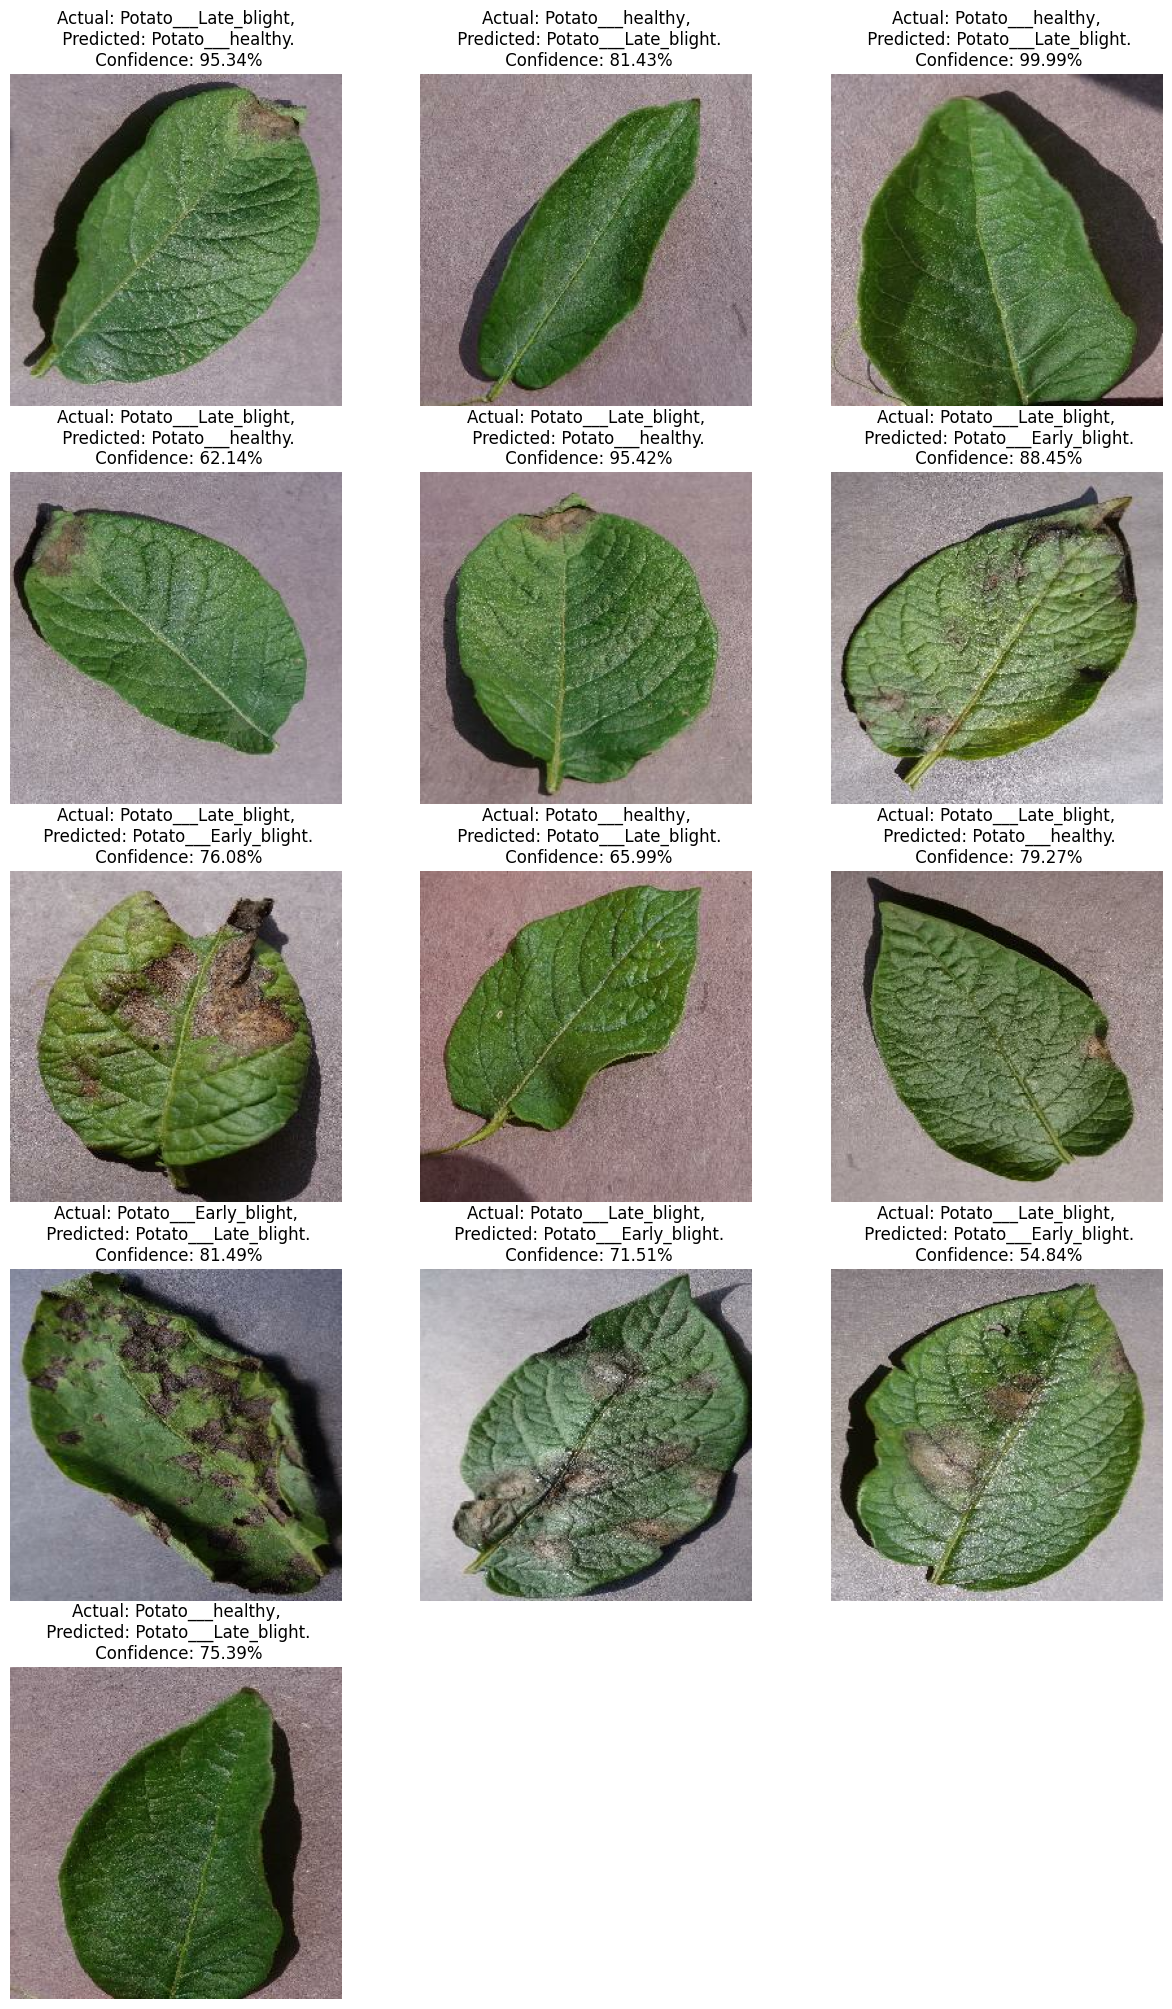

In [17]:
# Comment only to save space on GitHub
# Uncomment if needed

plt.figure(figsize=(15, 5 * lines))
for i in range(num_wrongs):
    ax = plt.subplot(lines, 3, i + 1)

    image, actual_class, predicted_class, confidence = wrong_predictions[i]
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    
    plt.axis("off")